<a href="https://colab.research.google.com/github/joanalawer/Capstone-Project/blob/main/Capstone_Project_8_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
data = pd.read_csv('framingham.csv')

FileNotFoundError: [Errno 2] No such file or directory: './Capstone_Project_8/framingham.csv'

# Exploratory Data Analysis (EDA)

In [ ]:
# drop first column by index
data = data.drop(data.columns[0], axis=1)
data.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,male,39,4.0,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,0
1,female,46,2.0,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,0
2,male,48,1.0,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,0
3,female,61,3.0,Yes,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,1
4,female,46,3.0,Yes,23.0,No,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# Setting the style for the plots
sns.set(style="whitegrid")

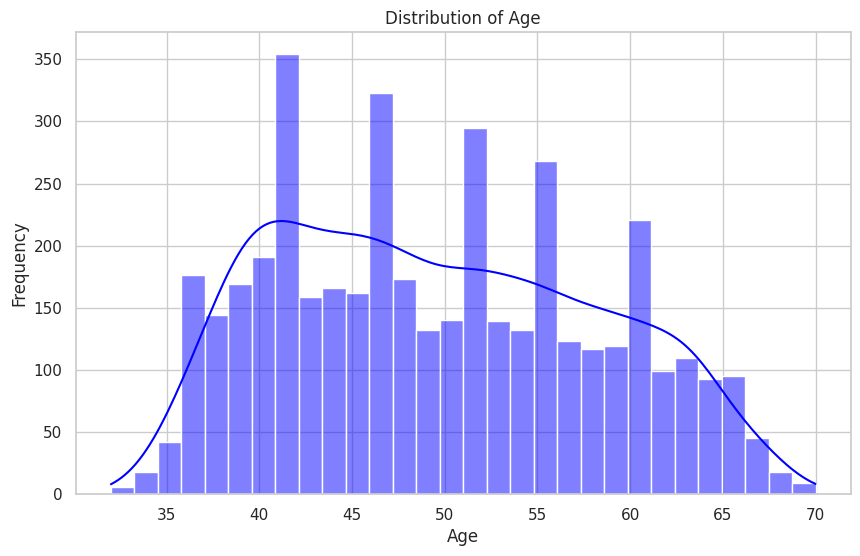

In [ ]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, bins=30, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

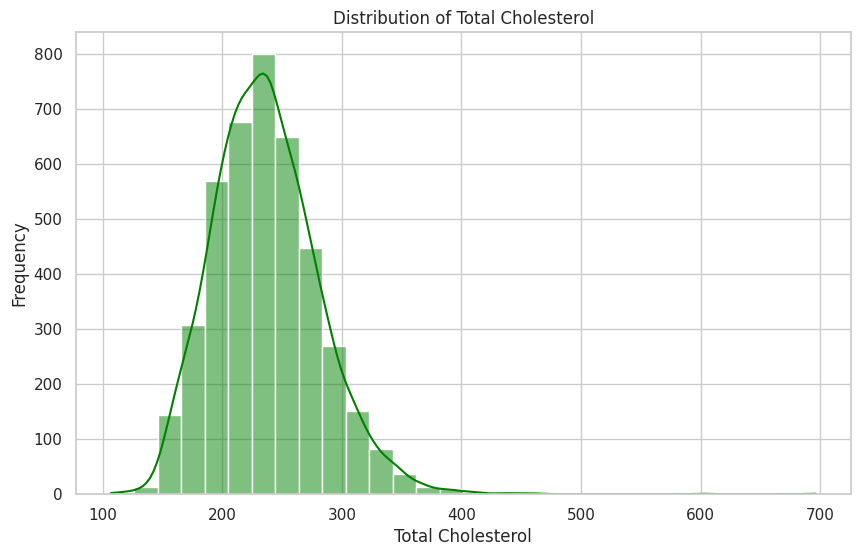

In [ ]:
# Distribution of Total Cholesterol
plt.figure(figsize=(10, 6))
sns.histplot(data['totChol'], kde=True, bins=30, color='green')
plt.title('Distribution of Total Cholesterol')
plt.xlabel('Total Cholesterol')
plt.ylabel('Frequency')
plt.show()

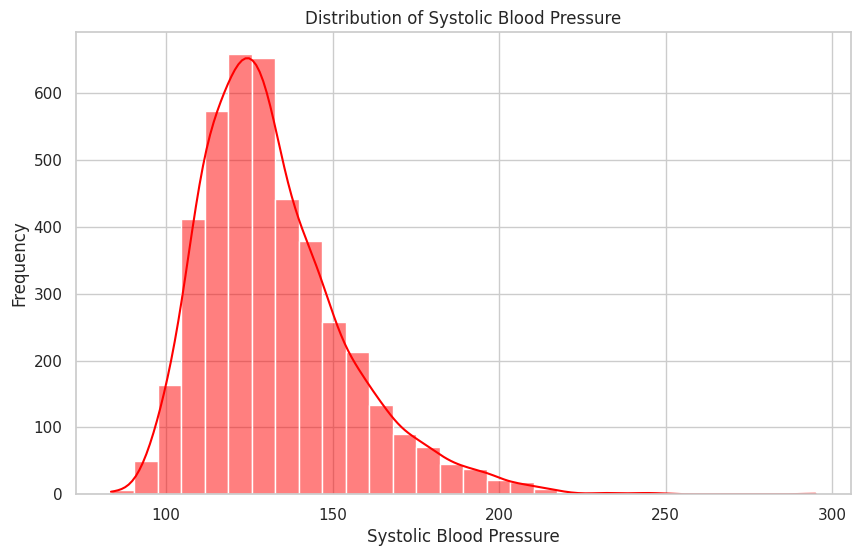

In [ ]:
# Distribution of Systolic Blood Pressure
plt.figure(figsize=(10, 6))
sns.histplot(data['sysBP'], kde=True, bins=30, color='red')
plt.title('Distribution of Systolic Blood Pressure')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Frequency')
plt.show()

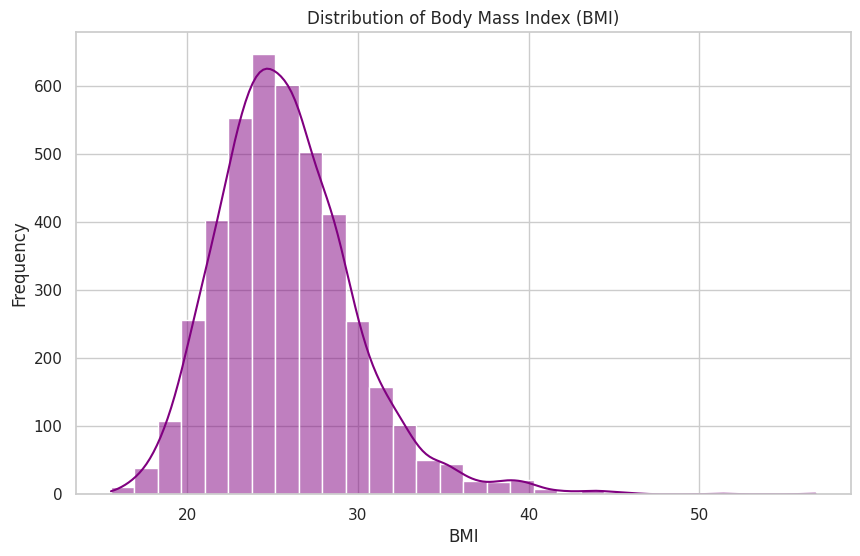

In [ ]:
# Distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(data['BMI'], kde=True, bins=30, color='purple')
plt.title('Distribution of Body Mass Index (BMI)')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

<Figure size 1400x1400 with 0 Axes>

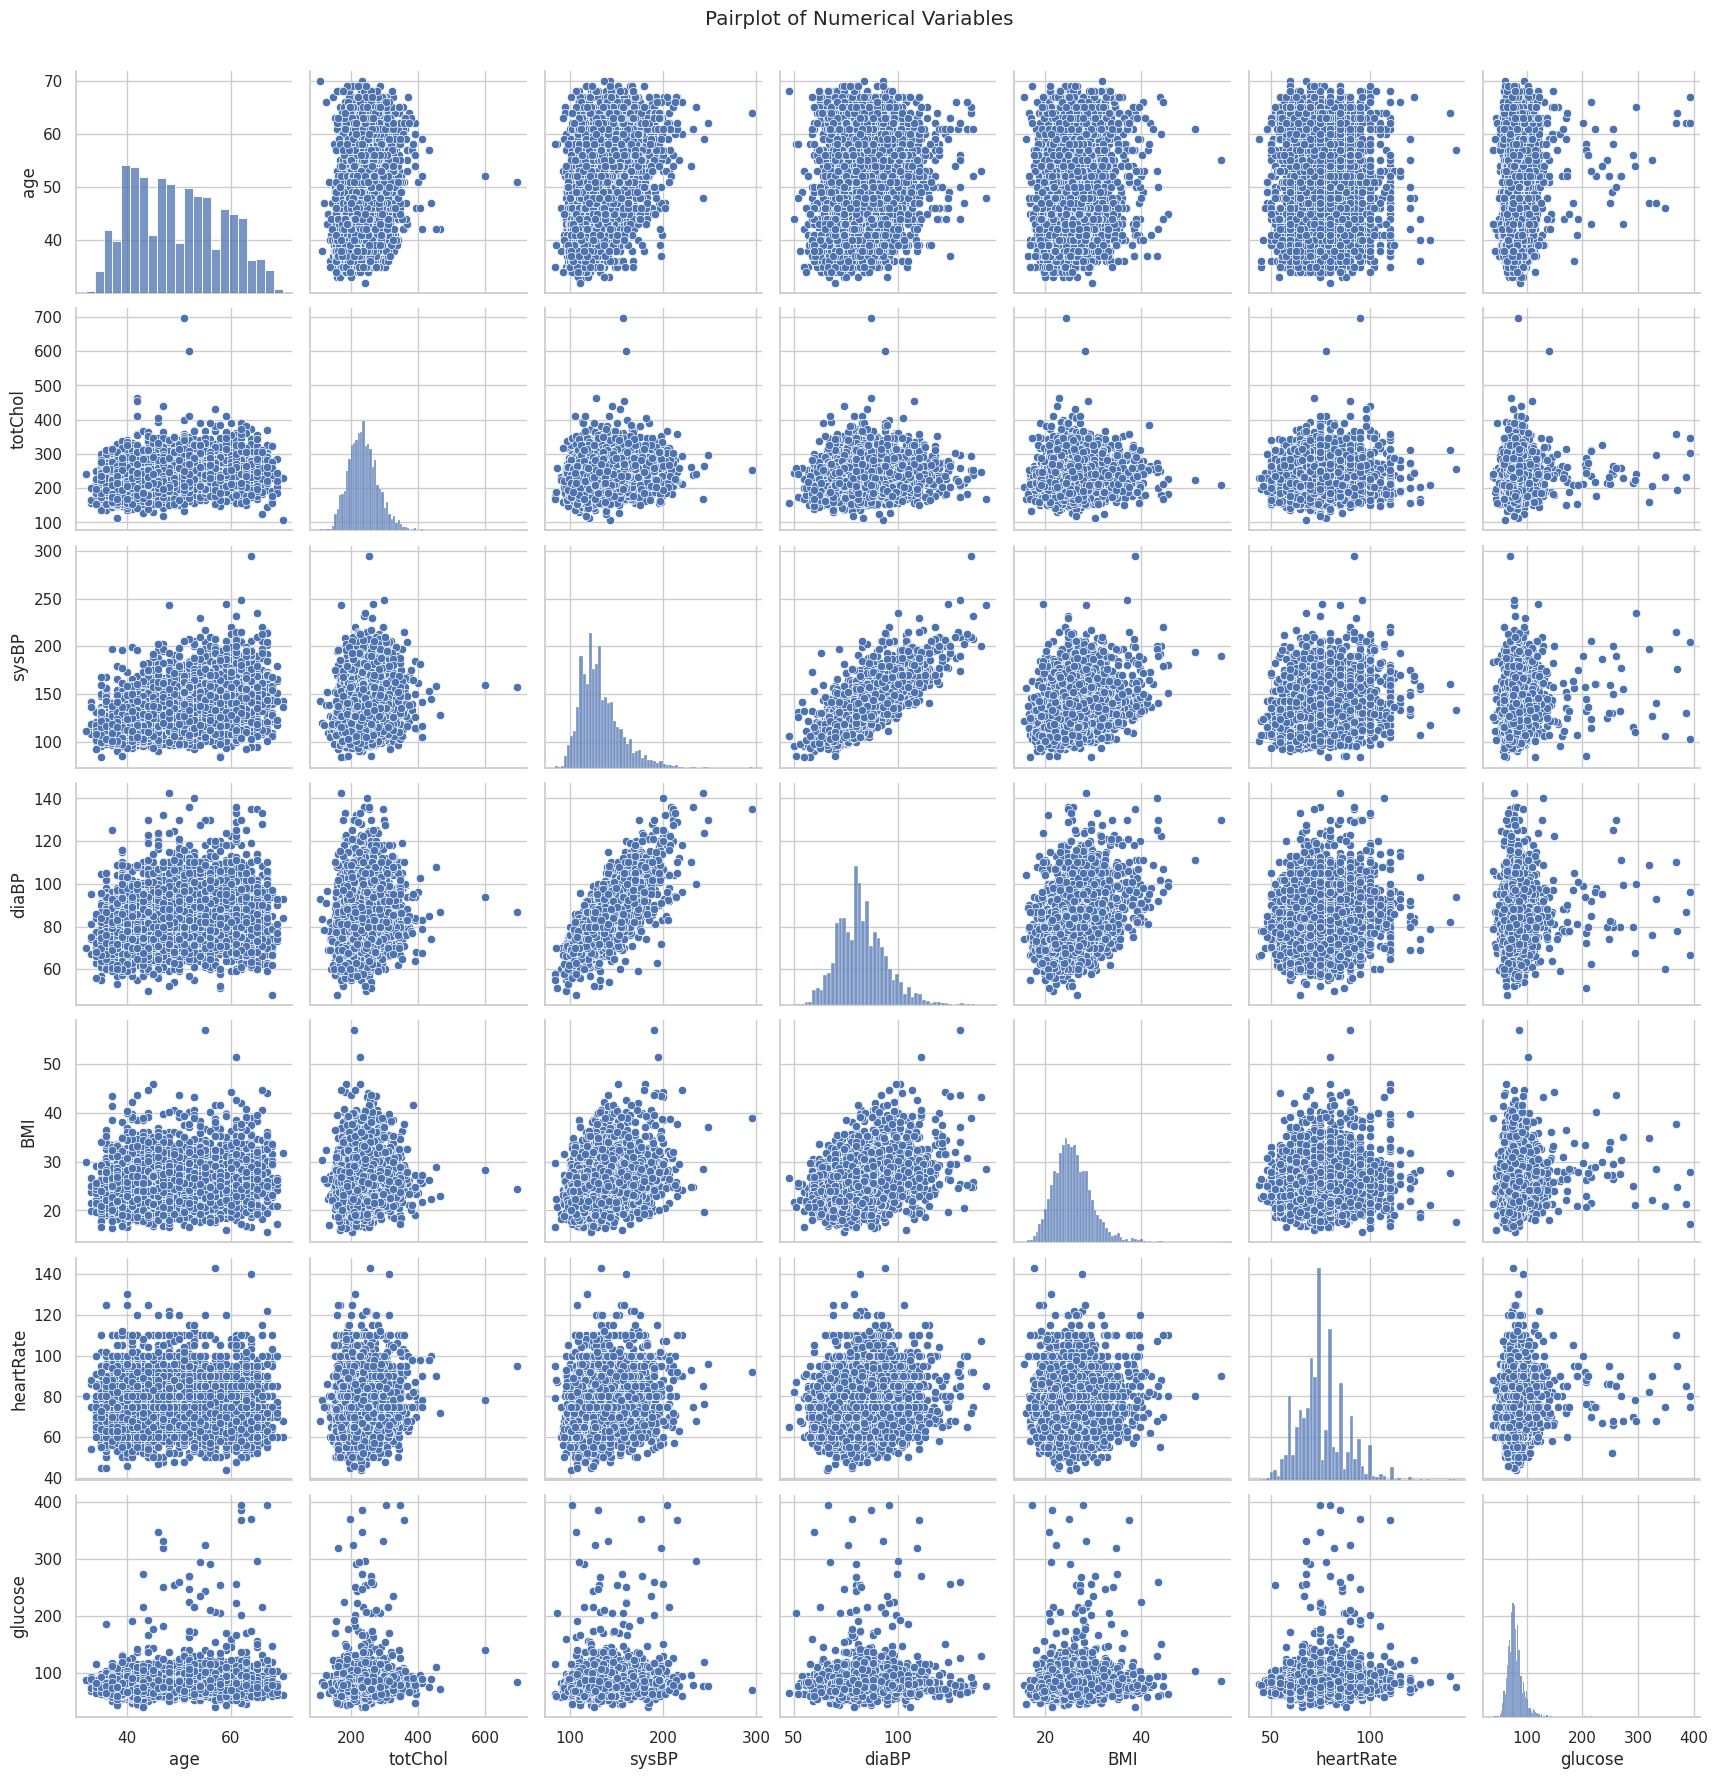

In [ ]:
# Pairplot for Numerical Variables
plt.figure(figsize=(14, 14))
sns.pairplot(data[['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

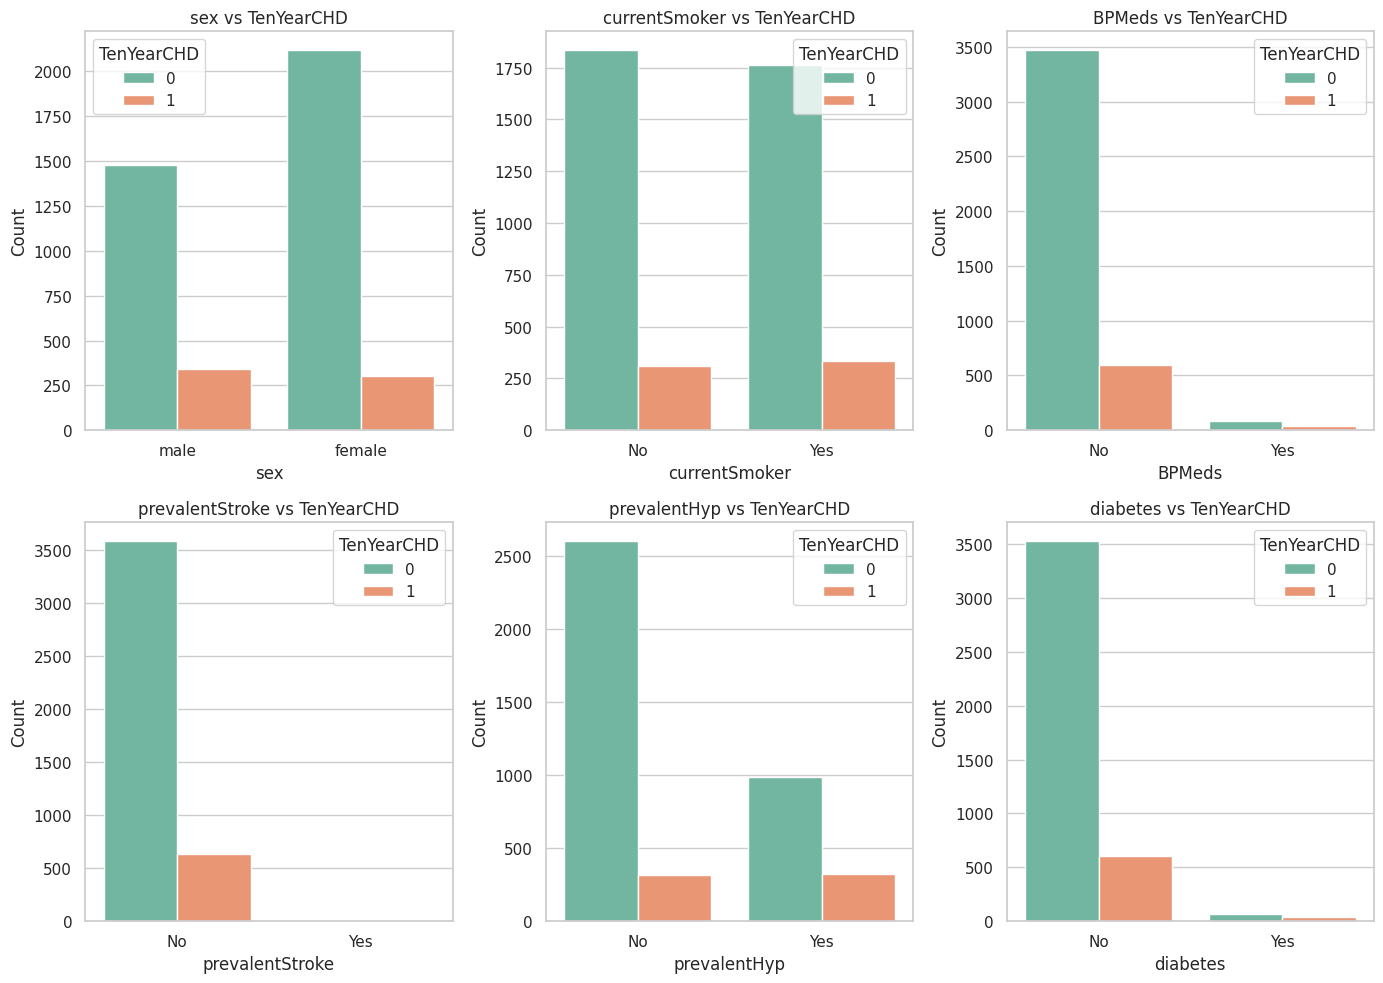

In [ ]:
# Count plots for Categorical Variables
categorical_vars = ['sex', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

plt.figure(figsize=(14, 10))
for i, var in enumerate(categorical_vars):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=data, x=var, hue='TenYearCHD', palette='Set2')
    plt.title(f'{var} vs TenYearCHD')
    plt.xlabel(var)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Preprocessing

In [ ]:
# Define the feature columns and target column
feature_columns = ['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
                   'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP',
                   'BMI', 'heartRate', 'glucose']

target_column = 'TenYearCHD'

In [ ]:
# Separate features and target
X = data[feature_columns]
y = data[target_column]

In [ ]:
# Define categorical and numerical columns
categorical_columns = ['sex', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
numerical_columns = ['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

<ipython-input-14-c9aff78bde3a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='TenYearCHD', y=var, palette='Set3')
<ipython-input-14-c9aff78bde3a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='TenYearCHD', y=var, palette='Set3')
<ipython-input-14-c9aff78bde3a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='TenYearCHD', y=var, palette='Set3')
<ipython-input-14-c9aff78bde3a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x`

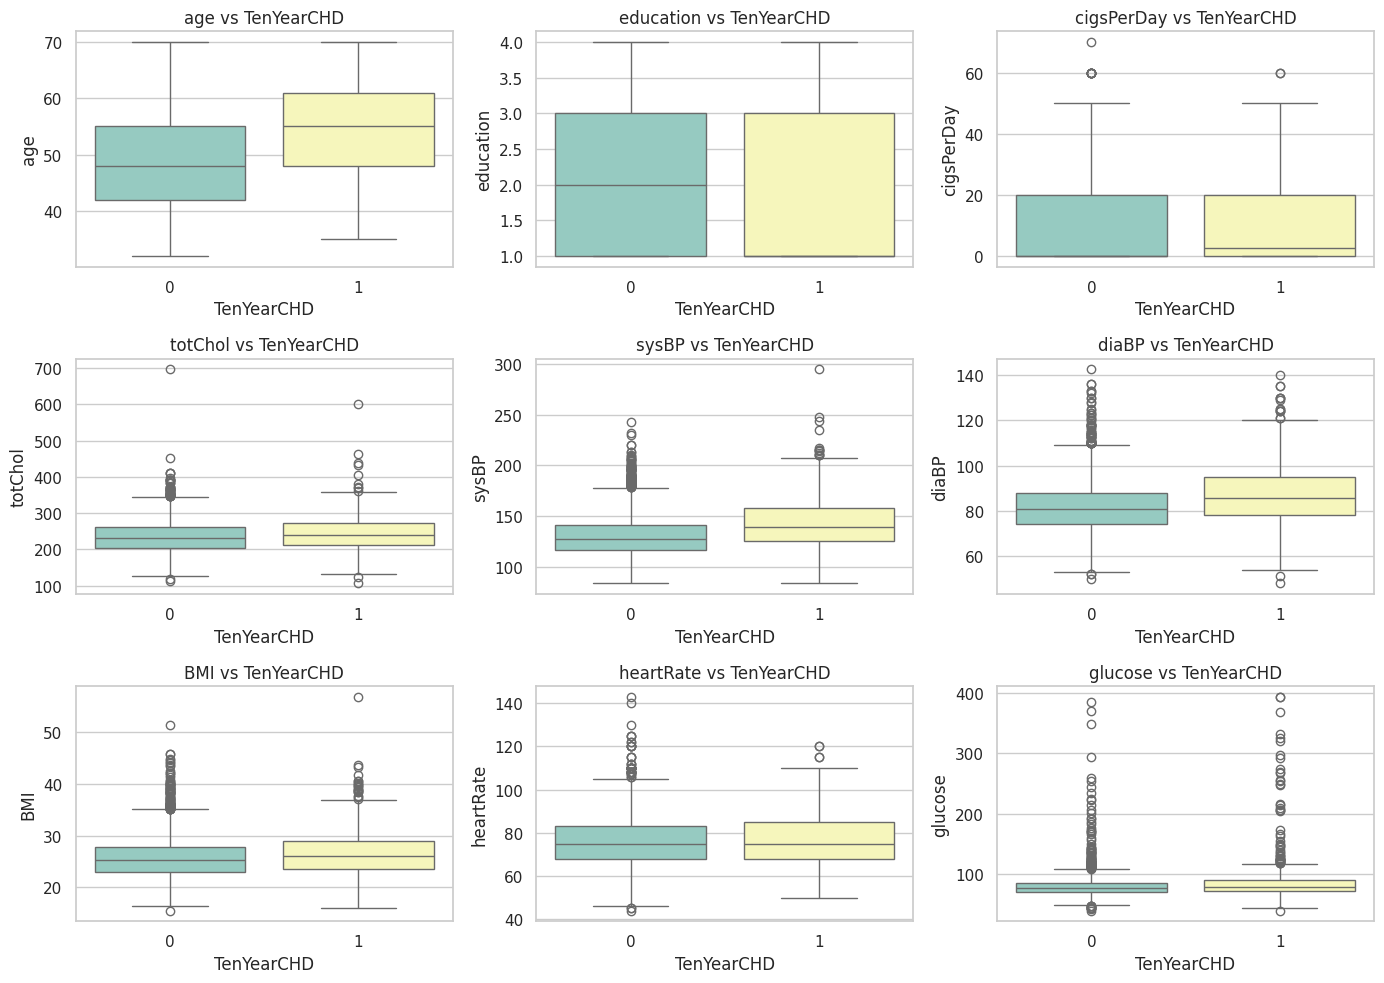

In [ ]:
# Box plots to visualize the spread of numerical variables against the target variable
plt.figure(figsize=(14, 10))
for i, var in enumerate(numerical_columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=data, x='TenYearCHD', y=var, palette='Set3')
    plt.title(f'{var} vs TenYearCHD')
plt.tight_layout()
plt.show()

In [ ]:
# Check for missing values in each feature
# df.isnull().sum()
print(f"{'Feature': <20} \t {'no. missing values': <20} \t {'Percantage of missing values': <20}")
for col in data.columns:
    print(f"{col: <20} \t {data[col].isna().sum(): <20} \t {np.round(data[col].isna().sum()/data.shape[0],2)*100}%")

Feature              	 no. missing values   	 Percantage of missing values
sex                  	 0                    	 0.0%
age                  	 0                    	 0.0%
education            	 105                  	 2.0%
currentSmoker        	 0                    	 0.0%
cigsPerDay           	 29                   	 1.0%
BPMeds               	 53                   	 1.0%
prevalentStroke      	 0                    	 0.0%
prevalentHyp         	 0                    	 0.0%
diabetes             	 0                    	 0.0%
totChol              	 50                   	 1.0%
sysBP                	 0                    	 0.0%
diaBP                	 0                    	 0.0%
BMI                  	 19                   	 0.0%
heartRate            	 1                    	 0.0%
glucose              	 388                  	 9.0%
TenYearCHD           	 0                    	 0.0%


In [ ]:
# Preprocessing for numerical data: impute missing values and standardize
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


In [ ]:
# Preprocessing for categorical data: impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [ ]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

In [ ]:
data['sex'] = data['sex'].map({'male': 1, 'female': 2})

In [ ]:
# Fit and transform the preprocessor on your data
X_processed = preprocessor.fit_transform(data)

In [ ]:
X_processed_df = pd.DataFrame(X_processed)
X_processed_df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.234951,2.007088,-0.757974,-0.941346,-1.195907,-1.082625,0.286943,0.342744,-0.217517,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-0.418257,0.020905,-0.757974,0.299595,-0.515187,-0.158988,0.719325,1.590275,-0.261311,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.184916,-0.972187,0.925835,0.186782,-0.220209,-0.242955,-0.113502,-0.073099,-0.524078,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.331800,1.013996,1.767740,-0.264469,0.800871,1.016549,0.682474,-0.904786,0.921141,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,-0.418257,1.013996,1.178407,1.089284,-0.106755,0.092912,-0.663807,0.758588,0.132840,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,0.048425,-0.972187,-0.673784,1.721036,2.116930,0.764648,0.041271,-0.821617,0.176634,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4234,0.165095,1.013996,2.862216,-0.670595,-0.265590,-0.242955,-1.496634,-0.904786,-0.611667,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4235,-0.184916,0.020905,0.925835,0.254470,-0.061374,-0.914691,-0.934046,0.675419,0.176634,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4236,-0.651598,-0.972187,0.504883,-0.602907,-0.265590,0.344813,-1.631754,0.841756,0.000000,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


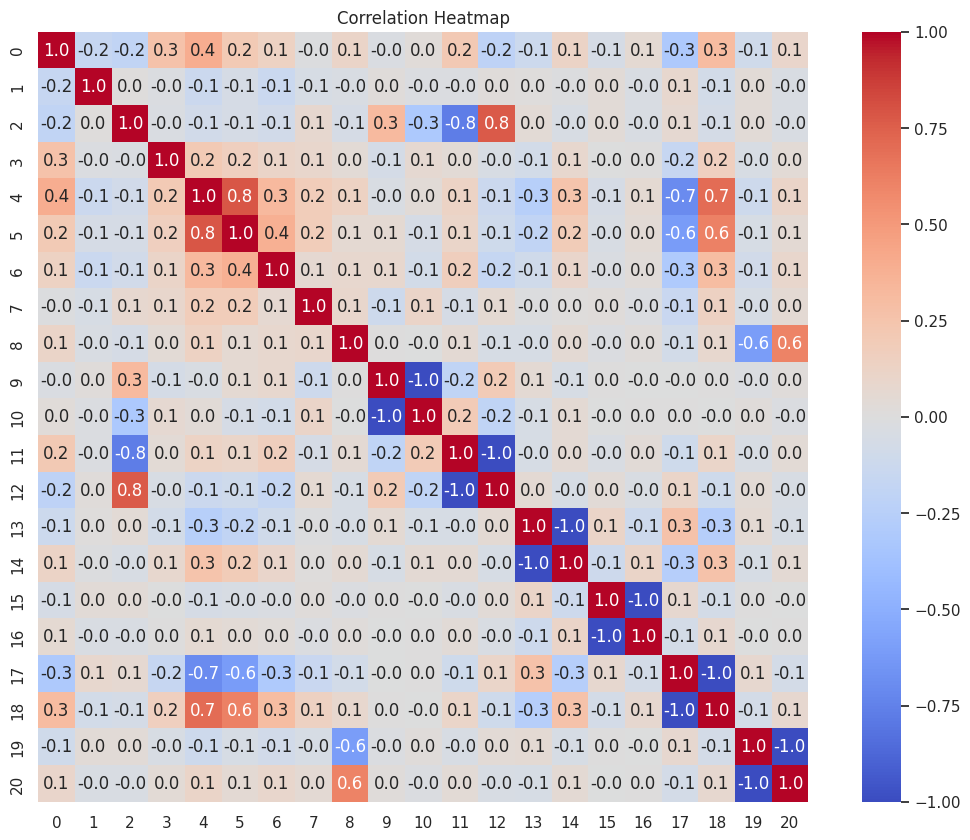

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(14, 10))
corr_matrix = X_processed_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt = '.1f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

# Model Implementation

In [ ]:
# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
# Display evaluation metrics
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8549528301886793
Confusion Matrix:
[[715   9]
 [114  10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.53      0.08      0.14       124

    accuracy                           0.85       848
   macro avg       0.69      0.53      0.53       848
weighted avg       0.81      0.85      0.81       848



In [ ]:
# Hyperparameter Tuning
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'education',
                                                                          'cigsPerDay',
                                                                          'totChol',
                                                                          'sysBP',
                                                                          'diaBP',
                                                                          'BMI',
                                                                          'heartRate',
                                                                          'glucose']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneH...ore'))]),
                                                                         ['sex',
                                                                          'currentSmoker',
                                                                          'BPMeds',
                                                                          'prevalentStroke',
                                                                          'prevalentHyp',
                                                                          'diabetes'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Train the model with the best parameters
best_model = grid_search.best_estimator_

Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}


In [ ]:
# Predict on the test set with the best parameters
y_pred_best = best_model.predict(X_test)

In [ ]:
# Evaluate the model with the best parameters
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

In [ ]:
# Display evaluation metrics after hyperparameter tuning
print(f'Accuracy after Hyperparameter Tuning: {accuracy_best}')
print('Confusion Matrix after Hyperparameter Tuning:')
print(conf_matrix_best)
print('Classification Report after Hyperparameter Tuning:')
print(class_report_best)

Accuracy after Hyperparameter Tuning: 0.8549528301886793
Confusion Matrix after Hyperparameter Tuning:
[[715   9]
 [114  10]]
Classification Report after Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.53      0.08      0.14       124

    accuracy                           0.85       848
   macro avg       0.69      0.53      0.53       848
weighted avg       0.81      0.85      0.81       848

